In [220]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV

In [221]:
df_penguins = sns.load_dataset("penguins")

In [222]:
df_penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [223]:
df_penguins.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [224]:
df_penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [225]:
df_penguins.describe(include = ["O"])

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,MALE
freq,152,168,168


In [226]:
df_penguins = df_penguins[df_penguins["sex"].notnull()]

In [227]:
df_penguins.describe(include = ["O"])

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,MALE
freq,146,163,168


In [228]:
df_penguins.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [229]:

df_penguins.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

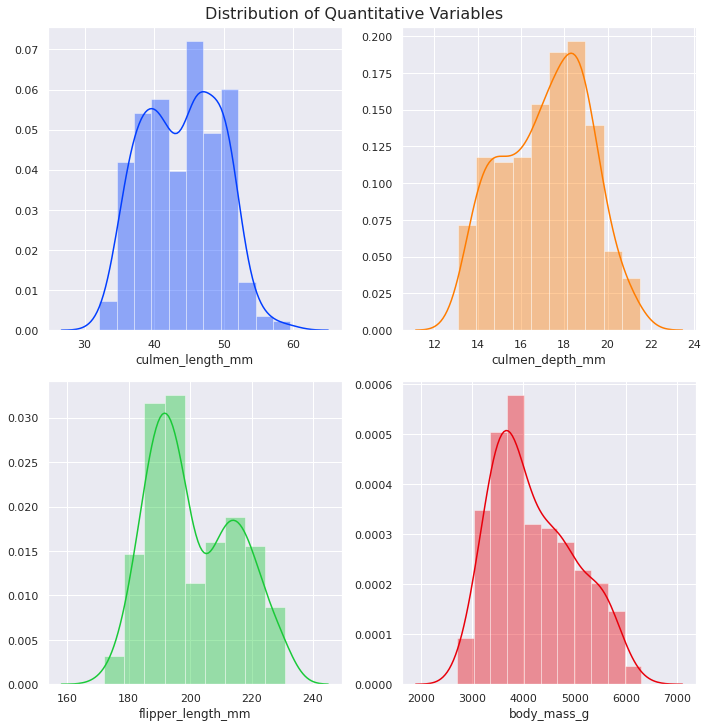

In [230]:
sns.set(color_codes=True)
colors = sns.color_palette("bright")

fig, axes = plt.subplots(2,2, figsize = (10,10))

sns.distplot(df_penguins["culmen_length_mm"], color = colors[0], ax = axes[0,0])
sns.distplot(df_penguins["culmen_depth_mm"], color = colors[1], ax = axes[0,1])
sns.distplot(df_penguins["flipper_length_mm"], color = colors[2], ax = axes[1,0])
sns.distplot(df_penguins["body_mass_g"], color = colors[3], ax = axes[1,1])

plt.suptitle("Distribution of Quantitative Variables", y=1.01, size = 16)
plt.tight_layout()
plt.show()

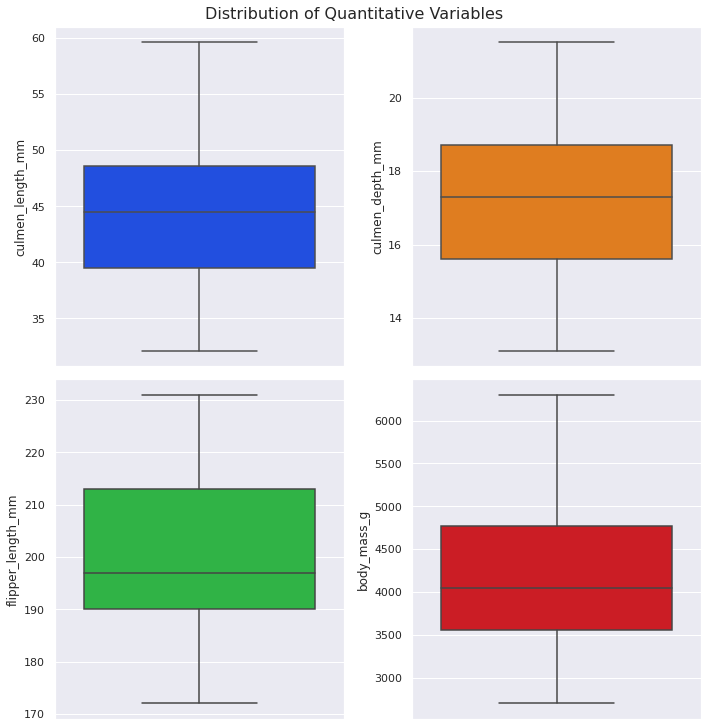

In [231]:
sns.set(color_codes=True)
colors = sns.color_palette("bright")

fig, axes = plt.subplots(2,2, figsize = (10,10))

sns.boxplot(y=df_penguins["culmen_length_mm"], color = colors[0], ax = axes[0,0])
sns.boxplot(y=df_penguins["culmen_depth_mm"], color = colors[1], ax = axes[0,1])
sns.boxplot(y=df_penguins["flipper_length_mm"], color = colors[2], ax = axes[1,0])
sns.boxplot(y=df_penguins["body_mass_g"], color = colors[3], ax = axes[1,1])

plt.suptitle("Distribution of Quantitative Variables", y=1.01, size = 16)
plt.tight_layout()
plt.show()

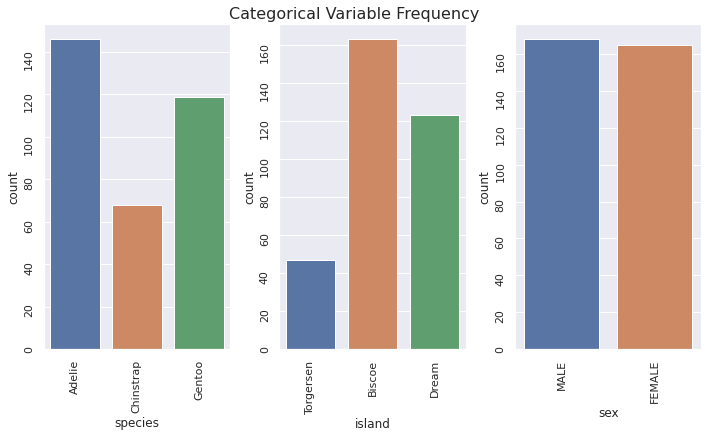

In [232]:
sns.set(color_codes=True)
colors = sns.color_palette("bright")

fig, axes = plt.subplots(1, 3, figsize=(10,6))

sns.countplot("species", data = df_penguins, ax = axes[0])
sns.countplot("island", data = df_penguins, ax = axes[1])
sns.countplot("sex", data = df_penguins, ax = axes[2])

#quick for loop to rotate the axis labels
for ax in fig.axes:
  ax.tick_params(labelrotation=90)

plt.suptitle("Categorical Variable Frequency", y=1.01, size = 16)
plt.tight_layout()
plt.show()

In [233]:
df_penguins = df_penguins.drop(columns = "island", axis=0)

In [234]:
df_penguins.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,39.3,20.6,190.0,3650.0,MALE


In [235]:
df_penguins["species"].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [236]:
adelie = df_penguins[df_penguins["species"]=="Adelie"].sample(n=50)
gentoo = df_penguins[df_penguins["species"]=="Gentoo"].sample(n=50)
chinstrap = df_penguins[df_penguins["species"]=="Chinstrap"].sample(n=50)

In [237]:
type(chinstrap)

pandas.core.frame.DataFrame

In [238]:
new_peng = pd.concat([adelie, gentoo, chinstrap], axis = 0)

In [239]:
new_peng

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
131,Adelie,43.1,19.2,197.0,3500.0,MALE
36,Adelie,38.8,20.0,190.0,3950.0,MALE
91,Adelie,41.1,18.1,205.0,4300.0,MALE
114,Adelie,39.6,20.7,191.0,3900.0,FEMALE
150,Adelie,36.0,17.1,187.0,3700.0,FEMALE
...,...,...,...,...,...,...
198,Chinstrap,50.1,17.9,190.0,3400.0,FEMALE
154,Chinstrap,51.3,19.2,193.0,3650.0,MALE
197,Chinstrap,50.8,18.5,201.0,4450.0,MALE
193,Chinstrap,46.2,17.5,187.0,3650.0,FEMALE


In [240]:
peng_sex = pd.get_dummies(new_peng["sex"])

In [241]:
new_peng = new_peng.drop(columns = "sex", axis = 0)

In [242]:
new_peng

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
131,Adelie,43.1,19.2,197.0,3500.0
36,Adelie,38.8,20.0,190.0,3950.0
91,Adelie,41.1,18.1,205.0,4300.0
114,Adelie,39.6,20.7,191.0,3900.0
150,Adelie,36.0,17.1,187.0,3700.0
...,...,...,...,...,...
198,Chinstrap,50.1,17.9,190.0,3400.0
154,Chinstrap,51.3,19.2,193.0,3650.0
197,Chinstrap,50.8,18.5,201.0,4450.0
193,Chinstrap,46.2,17.5,187.0,3650.0


In [243]:
final_df = pd.concat([new_peng, peng_sex], axis = 1)

In [244]:
final_df

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,FEMALE,MALE
131,Adelie,43.1,19.2,197.0,3500.0,0,1
36,Adelie,38.8,20.0,190.0,3950.0,0,1
91,Adelie,41.1,18.1,205.0,4300.0,0,1
114,Adelie,39.6,20.7,191.0,3900.0,1,0
150,Adelie,36.0,17.1,187.0,3700.0,1,0
...,...,...,...,...,...,...,...
198,Chinstrap,50.1,17.9,190.0,3400.0,1,0
154,Chinstrap,51.3,19.2,193.0,3650.0,0,1
197,Chinstrap,50.8,18.5,201.0,4450.0,0,1
193,Chinstrap,46.2,17.5,187.0,3650.0,1,0


In [245]:
train_df, test_df = train_test_split(final_df, test_size = 0.5, random_state = 32)

In [246]:
Y_test = test_df["species"]

X_test = test_df.drop(columns = ["species"], axis = 1)

Y_train = train_df["species"]

X_train = train_df.drop(columns = ["species"], axis = 1)

In [247]:
#binarize our categorical labels for the species
final_df["spec_id"] = final_df["species"].factorize()[0]

#setting up the assocaited dictionary for later usage with heat maps and confusion matrix
spec_id_df = final_df[["species","spec_id"]].drop_duplicates().sort_values("spec_id")

In [248]:
model_NB = MultinomialNB()

In [249]:
model_NB.fit(X_train, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [250]:
Y_pred_NB = model_NB.predict(X_test)

In [251]:
NB_conf_matrix = confusion_matrix(Y_test, Y_pred_NB)

In [252]:
NB_conf_matrix

array([[12, 16,  2],
       [ 1, 23,  0],
       [ 2,  1, 18]])

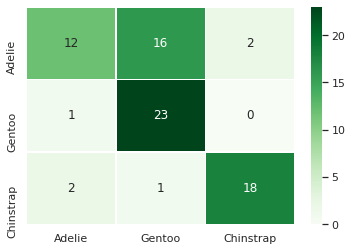

In [253]:
sns.set(color_codes=True)
sns.heatmap(NB_conf_matrix, cmap= "Greens", annot= True, linewidths= 0.5,
            xticklabels = spec_id_df["species"].values, yticklabels = spec_id_df["species"].values)

plt.show()

In [254]:
print("Classification Report: Naive Bayes")
print(classification_report(Y_test, Y_pred_NB))

Classification Report: Naive Bayes
              precision    recall  f1-score   support

      Adelie       0.80      0.40      0.53        30
   Chinstrap       0.57      0.96      0.72        24
      Gentoo       0.90      0.86      0.88        21

    accuracy                           0.71        75
   macro avg       0.76      0.74      0.71        75
weighted avg       0.76      0.71      0.69        75



In [255]:
model_log = LogisticRegression(multi_class="multinomial", max_iter=10000)

In [256]:
model_log.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [257]:
Y_pred_LOG = model_log.predict(X_test)

In [258]:
LOG_conf_matrix = confusion_matrix(Y_test, Y_pred_LOG)

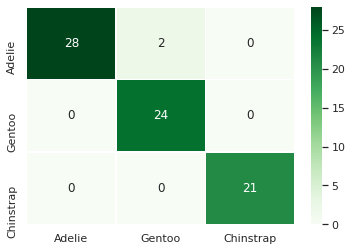

In [259]:
sns.set(color_codes=True)
sns.heatmap(LOG_conf_matrix, cmap= "Greens", annot= True, linewidths= 0.5,
            xticklabels = spec_id_df["species"].values, yticklabels = spec_id_df["species"].values)

plt.show()

In [260]:
print("Classification Report: Logistic")
print(classification_report(Y_test, Y_pred_LOG))
print(" ")
print("Classification Report: Naive Bayes")
print(classification_report(Y_test, Y_pred_NB))

Classification Report: Logistic
              precision    recall  f1-score   support

      Adelie       1.00      0.93      0.97        30
   Chinstrap       0.92      1.00      0.96        24
      Gentoo       1.00      1.00      1.00        21

    accuracy                           0.97        75
   macro avg       0.97      0.98      0.98        75
weighted avg       0.98      0.97      0.97        75

 
Classification Report: Naive Bayes
              precision    recall  f1-score   support

      Adelie       0.80      0.40      0.53        30
   Chinstrap       0.57      0.96      0.72        24
      Gentoo       0.90      0.86      0.88        21

    accuracy                           0.71        75
   macro avg       0.76      0.74      0.71        75
weighted avg       0.76      0.71      0.69        75



In [261]:
model_KN = KNeighborsClassifier()

In [262]:
model_KN.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [263]:
Y_pred_KN = model_KN.predict(X_test)

In [264]:
KN_conf_matrix = confusion_matrix(Y_test, Y_pred_KN)

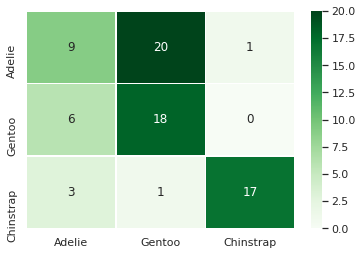

In [265]:
sns.set(color_codes=True)
sns.heatmap(KN_conf_matrix, cmap= "Greens", annot= True, linewidths= 0.5,
            xticklabels = spec_id_df["species"].values, yticklabels = spec_id_df["species"].values)

plt.show()

In [266]:
print("Classification Report: Logistic")
print(classification_report(Y_test, Y_pred_LOG))
print(" ")
print("Classification Report: Naive Bayes")
print(classification_report(Y_test, Y_pred_NB))
print(" ")
print("Classification Report: KNN")
print(classification_report(Y_test, Y_pred_KN))

Classification Report: Logistic
              precision    recall  f1-score   support

      Adelie       1.00      0.93      0.97        30
   Chinstrap       0.92      1.00      0.96        24
      Gentoo       1.00      1.00      1.00        21

    accuracy                           0.97        75
   macro avg       0.97      0.98      0.98        75
weighted avg       0.98      0.97      0.97        75

 
Classification Report: Naive Bayes
              precision    recall  f1-score   support

      Adelie       0.80      0.40      0.53        30
   Chinstrap       0.57      0.96      0.72        24
      Gentoo       0.90      0.86      0.88        21

    accuracy                           0.71        75
   macro avg       0.76      0.74      0.71        75
weighted avg       0.76      0.71      0.69        75

 
Classification Report: KNN
              precision    recall  f1-score   support

      Adelie       0.50      0.30      0.37        30
   Chinstrap       0.46      0.

In [267]:
model_SVC = SVC()

In [268]:
model_SVC.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [269]:
Y_pred_SVC = model_SVC.predict(X_test)

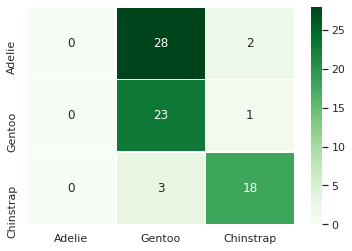

In [270]:
SVC_conf_matrix = confusion_matrix(Y_test, Y_pred_SVC)

sns.set(color_codes=True)
sns.heatmap(SVC_conf_matrix, cmap= "Greens", annot= True, linewidths= 0.5,
            xticklabels = spec_id_df["species"].values, yticklabels = spec_id_df["species"].values)

plt.show()

In [271]:
print("Classification Report: Logistic")
print(classification_report(Y_test, Y_pred_LOG))
print(" ")
print("Classification Report: Naive Bayes")
print(classification_report(Y_test, Y_pred_NB))
print(" ")
print("Classification Report: KNN")
print(classification_report(Y_test, Y_pred_KN))
print(" ")
print("Classification Report: SVC")
print(classification_report(Y_test, Y_pred_SVC))

Classification Report: Logistic
              precision    recall  f1-score   support

      Adelie       1.00      0.93      0.97        30
   Chinstrap       0.92      1.00      0.96        24
      Gentoo       1.00      1.00      1.00        21

    accuracy                           0.97        75
   macro avg       0.97      0.98      0.98        75
weighted avg       0.98      0.97      0.97        75

 
Classification Report: Naive Bayes
              precision    recall  f1-score   support

      Adelie       0.80      0.40      0.53        30
   Chinstrap       0.57      0.96      0.72        24
      Gentoo       0.90      0.86      0.88        21

    accuracy                           0.71        75
   macro avg       0.76      0.74      0.71        75
weighted avg       0.76      0.71      0.69        75

 
Classification Report: KNN
              precision    recall  f1-score   support

      Adelie       0.50      0.30      0.37        30
   Chinstrap       0.46      0.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [272]:
model_RF = RandomForestClassifier()
model_RF.fit(X_train, Y_train)
Y_pred_RF = model_RF.predict(X_test)

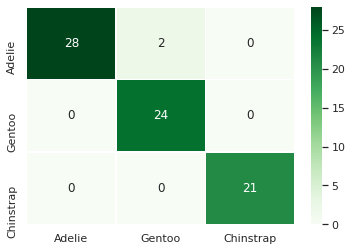

In [273]:
RF_conf_matrix = confusion_matrix(Y_test, Y_pred_RF)

sns.set(color_codes=True)
sns.heatmap(RF_conf_matrix, cmap= "Greens", annot= True, linewidths= 0.5,
            xticklabels = spec_id_df["species"].values, yticklabels = spec_id_df["species"].values)

plt.show()

In [275]:
print("Classification Report: Logistic")
print(classification_report(Y_test, Y_pred_LOG))
print(" ")
print("Classification Report: Naive Bayes")
print(classification_report(Y_test, Y_pred_NB))
print(" ")
print("Classification Report: RF")
print(classification_report(Y_test, Y_pred_RF))

Classification Report: Logistic
              precision    recall  f1-score   support

      Adelie       1.00      0.93      0.97        30
   Chinstrap       0.92      1.00      0.96        24
      Gentoo       1.00      1.00      1.00        21

    accuracy                           0.97        75
   macro avg       0.97      0.98      0.98        75
weighted avg       0.98      0.97      0.97        75

 
Classification Report: Naive Bayes
              precision    recall  f1-score   support

      Adelie       0.80      0.40      0.53        30
   Chinstrap       0.57      0.96      0.72        24
      Gentoo       0.90      0.86      0.88        21

    accuracy                           0.71        75
   macro avg       0.76      0.74      0.71        75
weighted avg       0.76      0.71      0.69        75

 
Classification Report: RF
              precision    recall  f1-score   support

      Adelie       1.00      0.93      0.97        30
   Chinstrap       0.92      1.0